# EJEMPLO MÉTRICAS DE REGRESIÓN


In [ ]:
Ejercicio realizado por: Angela Cristina Villate

In [11]:
import pandas as pd

In [12]:
#Importing the dataset
data = pd.read_csv("Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [13]:
x = data.iloc[:,2].values #Indexación basada en ubicaciones enteras para selección la posición.
y = data.iloc[:,4].values

In [14]:
y=y.reshape(-1, 1) #cambiar la forma de una matriz. Vector columna.
x=x.reshape(-1, 1)
print(x.shape, y.shape)

(200, 1) (200, 1)


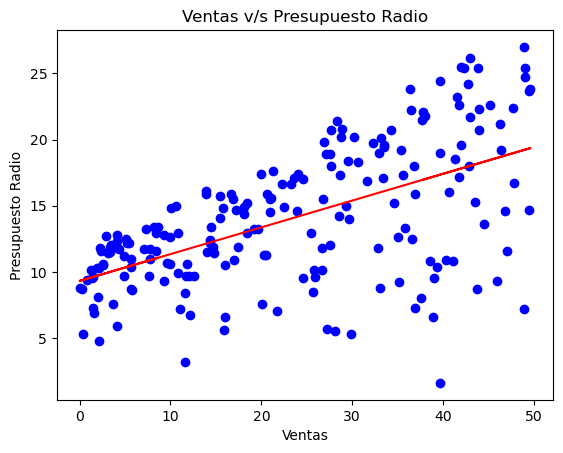

In [15]:
# Importar LinearRegression.

from sklearn.linear_model import LinearRegression

# modelo de regresión lineal vacío
radio_model = LinearRegression()

# Para crear el modelo, usamos fit(x,y)
radio_model.fit(x,y)

#para graficar cargamos matplotlib 
import matplotlib.pyplot as plt


y_pred = radio_model.predict(x)
plt.scatter(x,y,color = 'b')
plt.plot(x,y_pred,color = 'r')
plt.title('Ventas v/s Presupuesto Radio')
plt.xlabel('Ventas')
plt.ylabel('Presupuesto Radio')
plt.show()

In [16]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.33203245544529525

Fuente: https://machinelearningmastery.com/regression-metrics-for-machine-learning/

## Mean square error MSE

In [17]:
data2=data
data2.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [31]:
#dividiremos el conjunto de datos en 2 entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data2['Sales'].to_numpy(),data2['Radio'].to_numpy(), test_size=0.20, random_state=5)


In [37]:
#Linear regression model
linear_reg=LinearRegression()
linear_reg.fit(X_train.reshape(-1, 1), y_train)
linreg_radio=linear_reg.predict(X_test.reshape(-1, 1))
data2_predict=pd.DataFrame({'Sales': X_test,'Radio': y_test, 'LinRegPredictedRadio':linreg_radio})




In [38]:
data2_predict

,Sales,Radio,LinRegPredictedRadio
0,6.6,16.0,12.051861
1,14.2,28.5,23.918909
2,10.9,40.3,18.766112
3,10.1,25.8,17.516949
4,15.6,21.1,26.104944
5,11.6,8.4,19.859130
6,11.6,2.4,19.859130
7,11.8,32.8,20.171420
8,18.9,27.1,31.257742
9,12.4,14.3,21.108293


In [43]:
# example of calculate the mean squared error
from sklearn.metrics import mean_squared_error
import numpy as np
# real value
expected = y_test
# predicted value
predicted = data2_predict.LinRegPredictedRadio
# calculate errors
errors = mean_squared_error(expected, predicted, squared=False)
# report error
print(errors)

11.521981604198631


## Root Mean square error RMSE

In [44]:
# example of calculate the root mean squared error
from sklearn.metrics import mean_squared_error
# calculate errors
errors = mean_squared_error(expected, predicted)
# report error
print(errors)

132.75606008749165


## Mean Absolute Error MAE

In [45]:
# example of calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
# calculate errors
errors = mean_absolute_error(expected, predicted)
# report error
print(errors)

9.749110149706643


## Root Mean Square Logarithmic Error (RMSLE)

In [6]:
 # example of calculate the mean absolute error
from sklearn.metrics import mean_squared_log_error
# calculate errors
errors = mean_squared_log_error(expected, predicted)
# report error
print(errors)
    

0.14402673725223544


## R2_Score

In [46]:
 # example of calculate the mean absolute error
from sklearn.metrics import r2_score
# real value
expected = y_test
# predicted value
#predicted = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
predicted = data2_predict.LinRegPredictedRadio
# calculate errors
errors = r2_score(expected, predicted)
# report error
print(errors)

0.41564102370401024
